# Results notebook

In this notebook, I have tested out the different algorithms:
- how long they take to find the goal position
- memory usage
- how optimal is the path, this is shown by:
    - distance of the path
    - how many turns need to be taken
    - also modelling the acceleration of the mouse, we can account for the time it "would" take in real time to travel a path 

In [30]:
from algorithms.utilities.Utils import Utils
from algorithms.utilities.Stats import Stats

from algorithms.classical.floodfill.FloodFill import FloodFill
from algorithms.classical.bfs.BFS import BFS
from algorithms.classical.dijkstra.Dijkstra import Dijkstra
from algorithms.classical.astar.AStar import AStar

from algorithms.reinforcement_learning.sarsa.Sarsa import Sarsa
from algorithms.reinforcement_learning.q_learning.Qlearning import QLearning
from algorithms.reinforcement_learning.dynaq.DynaQLearning import DynaQLearning
from algorithms.reinforcement_learning.dynaq.DynaQSarsa import DynaQSarsa

In [31]:
maze = Utils.load_maze('mazes/competition_json/alljapan-044-2023-exp-fin.json')

## Classical Algorithms

### Floodfill

In [32]:
flood = FloodFill(walls=maze)
flood_path = flood.get_path_from_flood_map()
print(flood.get_stats())

(52, 25, 0)


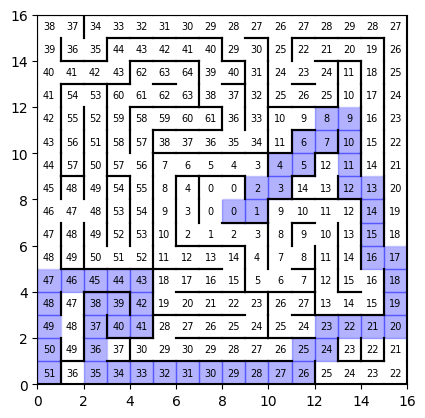

In [33]:
Utils().draw_maze(walls=maze, path=flood_path, dist_map= flood.flood_map)

In [34]:
stats = Stats()
print(stats.get_time_from_path(flood_path))

60.261954941719566


### BFS

In [35]:
bfs = BFS(walls=maze)
bfs_path = bfs.find_shortest_path_to_goal()
print(bfs.get_stats())

1
(52, 27, 0)


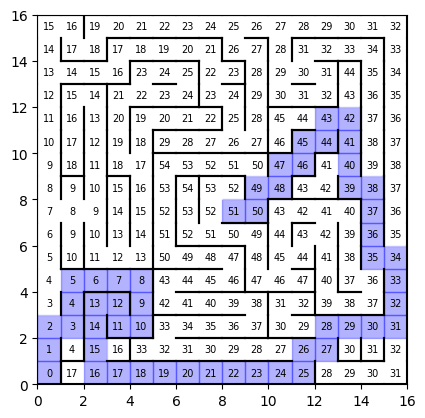

In [36]:
Utils().draw_maze(walls=maze, path=bfs_path, dist_map = bfs.distances)

In [37]:
stats = Stats()
print(stats.get_time_from_path(bfs_path))

63.82341512221436


### Dijkstra

In [38]:
dijkstra = Dijkstra(walls=maze)
dijkstra_path = dijkstra.find_shortest_path_to_goal()
print(dijkstra.get_stats())

(52, 28, 0)


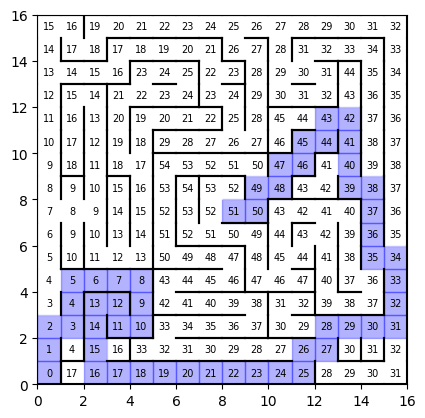

In [39]:
Utils().draw_maze(walls=maze, path=dijkstra_path, dist_map = dijkstra.distances)

In [40]:
print(stats.get_time_from_path(dijkstra_path))

63.82341512221436


### A*

In [41]:
astar = AStar(walls=maze)
astar_path = astar.find_shortest_path_to_goal()
print(astar.get_stats())

Filename: D:\Diss\Simulator\final\algorithms\classical\astar\AStar.py

Line #    Mem usage    Increment  Occurrences   Line Contents
    51    118.2 MiB    118.2 MiB           1       @profile
    52                                             def find_shortest_path_to_goal(self):
    53    118.2 MiB      0.0 MiB           1           self.a_star()
    54    118.2 MiB      0.0 MiB           9           goal_position = min(self.goal_positions, key=lambda pos: self.distances[pos[0]][pos[1]])
    55    118.2 MiB      0.0 MiB           1           self.curr_position = goal_position
    56    118.2 MiB      0.0 MiB           1           self.path.append(self.curr_position)
    57                                         
    58    118.2 MiB      0.0 MiB          52           while self.curr_position != self.start_position:
    59    118.2 MiB      0.0 MiB          51               x, y = self.curr_position
    60    118.2 MiB      0.0 MiB         357               neighbors = [(x + dx, y + d

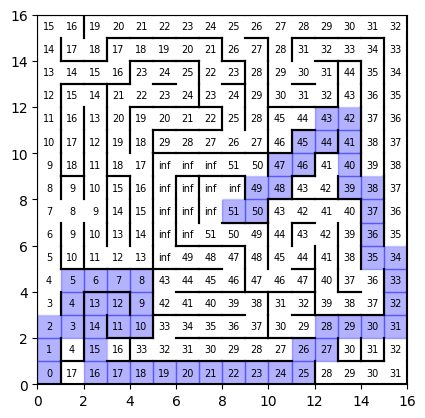

In [42]:
Utils().draw_maze(walls=maze, path=astar_path, dist_map = astar.distances)

In [43]:
stats = Stats()
print(stats.get_time_from_path(astar_path))

63.82341512221436


## Reinforcememnt Learning

### Sarsa

In [44]:
sarsa = Sarsa(walls=maze)

Running agent: 0
stopped at episode: 314
Running agent: 1
stopped at episode: 354
Running agent: 2
stopped at episode: 327
Running agent: 3
stopped at episode: 327
Running agent: 4
stopped at episode: 372
Running agent: 5
stopped at episode: 417
Running agent: 6
stopped at episode: 339
Running agent: 7
stopped at episode: 341
Running agent: 8
stopped at episode: 543
Running agent: 9
stopped at episode: 272
Running agent: 10
stopped at episode: 256
Running agent: 11
stopped at episode: 357
Running agent: 12
stopped at episode: 272
Running agent: 13
stopped at episode: 290
Running agent: 14
stopped at episode: 267
Choose path: [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10), (0, 11), (0, 12), (0, 13), (0, 14), (0, 15), (1, 15), (1, 14), (2, 14), (2, 15), (3, 15), (4, 15), (5, 15), (6, 15), (7, 15), (8, 15), (9, 15), (10, 15), (11, 15), (12, 15), (13, 15), (14, 15), (15, 15), (15, 14), (15, 13), (15, 12), (15, 11), (15, 10), (15, 9), (15, 8), (15, 

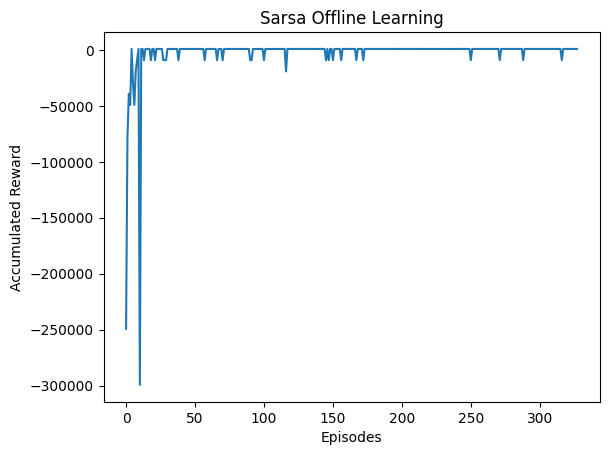

In [45]:
sarsa.run_sarsa()
sarsa_path = sarsa.get_path()

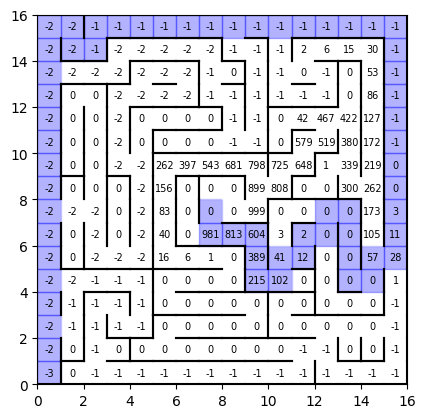

In [46]:
Utils.draw_maze(walls=maze, dist_map=sarsa.get_max_q_values(), path=sarsa_path)

In [47]:
stats = Stats()
stats.get_time_from_path(sarsa_path)

51.538914238329745

### QLearning


Running agent: 0
stopped at episode: 55
Running agent: 1
stopped at episode: 49
Running agent: 2
stopped at episode: 65
Running agent: 3
stopped at episode: 58
Running agent: 4
stopped at episode: 59
Running agent: 5
stopped at episode: 70
Running agent: 6
stopped at episode: 51
Running agent: 7
stopped at episode: 70
Running agent: 8
stopped at episode: 70
Running agent: 9
stopped at episode: 74
Running agent: 10
stopped at episode: 56
Running agent: 11
stopped at episode: 61
Running agent: 12
stopped at episode: 66
Running agent: 13
stopped at episode: 59
Running agent: 14
stopped at episode: 68
Choose path: [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (1, 4), (2, 4), (3, 4), (4, 4), (4, 3), (4, 2), (3, 2), (3, 3), (2, 3), (2, 2), (2, 1), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (9, 0), (10, 0), (11, 0), (11, 1), (10, 1), (9, 1), (8, 1), (7, 1), (6, 1), (5, 1), (5, 2), (6, 2), (7, 2), (8, 2), (9, 2), (9, 3), (8, 3), (7, 3), (6, 3), (5, 3), (5, 4), (6, 4), (7, 4), (8, 4), (

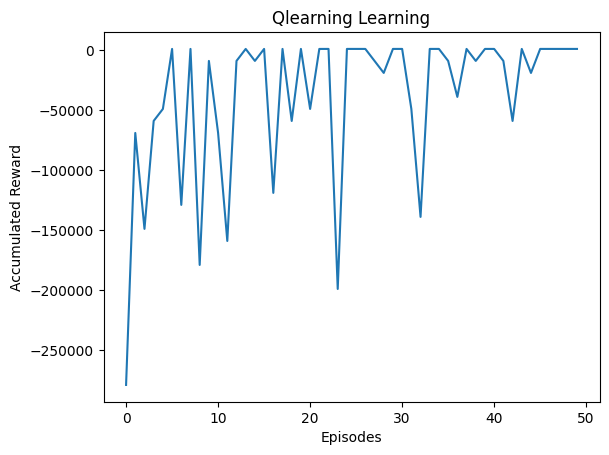

In [48]:
qlearning = QLearning(walls=maze)
qlearning.run_qlearning()
qlearning_path = qlearning.get_path()

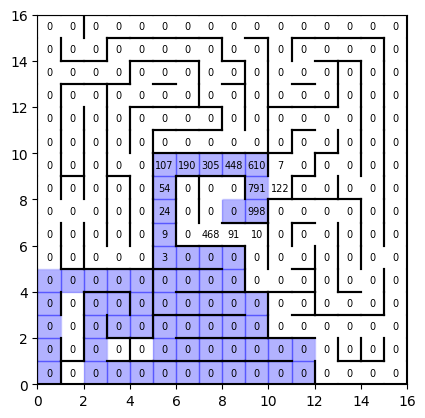

In [49]:
Utils.draw_maze(walls=maze, dist_map=qlearning.get_max_q_values(), path=qlearning_path)


In [50]:
stats = Stats()
stats.get_time_from_path(qlearning_path)

57.473155464271855

### DynaQ QLearning

Running agent: 0
stopped at episode: 11
Running agent: 1
stopped at episode: 7
Running agent: 2
stopped at episode: 8
Running agent: 3
stopped at episode: 6
Running agent: 4
stopped at episode: 6
Running agent: 5
stopped at episode: 12
Running agent: 6
stopped at episode: 6
Running agent: 7
stopped at episode: 18
Running agent: 8
stopped at episode: 6
Running agent: 9
stopped at episode: 7
Running agent: 10
stopped at episode: 7
Running agent: 11
stopped at episode: 8
Running agent: 12
stopped at episode: 6
Running agent: 13
stopped at episode: 7
Running agent: 14
stopped at episode: 9
Choose path: [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10), (0, 11), (0, 12), (0, 13), (0, 14), (0, 15), (1, 15), (1, 14), (2, 14), (2, 15), (3, 15), (4, 15), (5, 15), (6, 15), (7, 15), (8, 15), (9, 15), (10, 15), (11, 15), (12, 15), (13, 15), (14, 15), (15, 15), (15, 14), (15, 13), (15, 12), (15, 11), (15, 10), (15, 9), (15, 8), (15, 7), (15, 6), (15, 5), (14, 

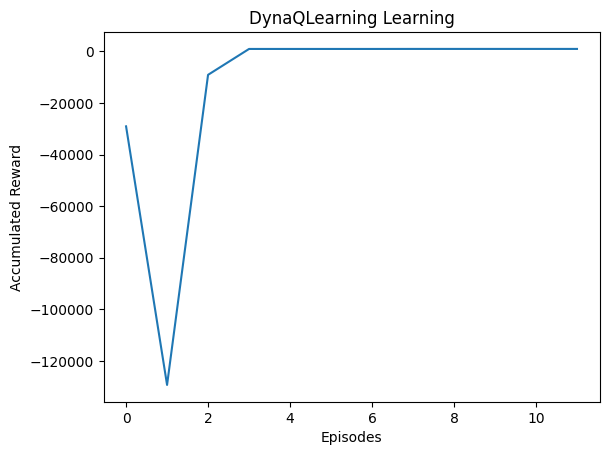

In [51]:
dyna_qlearning = DynaQLearning(walls=maze)
dyna_qlearning.run_dyna_qlearning()
dyna_qlearning_path = dyna_qlearning.get_path()

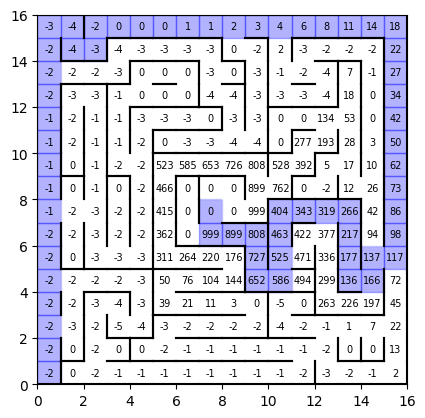

In [52]:
Utils.draw_maze(walls=maze, dist_map=dyna_qlearning.get_max_q_values(), path=dyna_qlearning_path)

In [53]:
stats = Stats()
stats.get_time_from_path(dyna_qlearning_path)

45.227514671025126

### DynaQ Sarsa


Running agent: 0
stopped at episode: 9
Running agent: 1
Running agent: 2
stopped at episode: 13
Running agent: 3
stopped at episode: 16
Running agent: 4
stopped at episode: 15
Running agent: 5
stopped at episode: 58
Running agent: 6
stopped at episode: 33
Running agent: 7
stopped at episode: 13
Running agent: 8
stopped at episode: 37
Running agent: 9
stopped at episode: 52
Running agent: 10
stopped at episode: 31
Running agent: 11
stopped at episode: 19
Running agent: 12
stopped at episode: 25
Running agent: 13
stopped at episode: 9
Running agent: 14
Choose path: [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10), (0, 11), (0, 12), (0, 13), (1, 13), (2, 13), (3, 13), (3, 14), (4, 14), (5, 14), (6, 14), (7, 14), (7, 13), (7, 12), (8, 12), (8, 11), (8, 10), (9, 10), (9, 11), (9, 12), (9, 13), (9, 14), (8, 14), (8, 15), (9, 15), (10, 15), (11, 15), (12, 15), (13, 15), (14, 15), (15, 15), (15, 14), (15, 13), (15, 12), (15, 11), (15, 10), (15, 9), (15, 

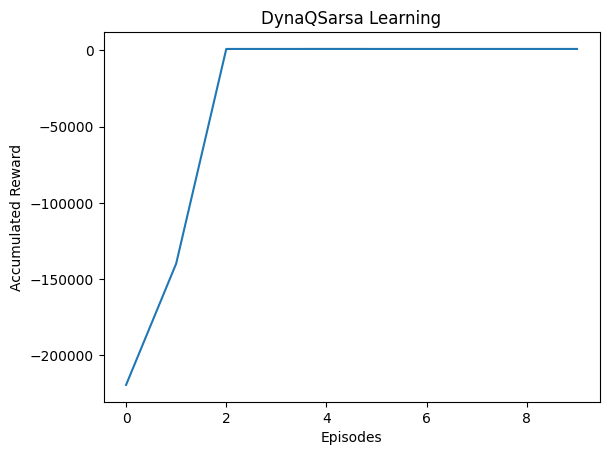

In [54]:
dynaq_sarsa = DynaQSarsa(walls=maze)
dynaq_sarsa.run_dyna_sarsa()
dynaq_sarsa_path = dynaq_sarsa.get_path()

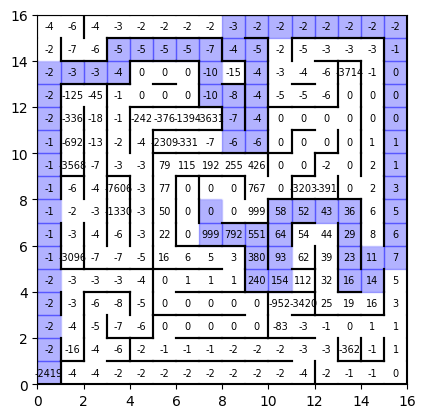

In [55]:
Utils.draw_maze(walls=maze, dist_map=dynaq_sarsa.get_max_q_values(), path=dynaq_sarsa_path)

In [56]:
stats = Stats()
stats.get_time_from_path(dynaq_sarsa_path)

60.07747202128561

In [57]:
# Max deceleration on micro-mouse when calculating reward
1/(2*0.09)

5.555555555555555

[ 0.12741311+2.46520567j  0.12741311-2.46520567j -1.42439923+0.j
 -0.230427  +0.j        ]
